In [1]:
import sys
import os
import importlib
import geopandas as gpd
import statistics
import time

# In order to use our local edited versions of open_cp
# scripts, we insert the parent directory of the current
# file ("..") at the start of our sys.path here.
sys.path.insert(0, os.path.abspath(".."))

# Elements from PredictCode's custom "open_cp" package
import open_cp
import open_cp.knox

#import riskModelsGeneric
#importlib.reload(riskModelsGeneric)
import knoxAnalysis
importlib.reload(knoxAnalysis)
from knoxAnalysis import make_knox_info_file, make_graphs_from_knox_file
import crimeRiskTimeTools
importlib.reload(crimeRiskTimeTools)

<module 'crimeRiskTimeTools' from 'C:\\Users\\lawdfo\\Documents\\GitHub\\PredictCode\\sandbox\\crimeRiskTimeTools.py'>

In [2]:

# Location of data file
datadir = "../../Data"

# Input csv file name
in_csv_file_name = "chi_all_s_BURGLARY_RES_010101_190101_stdXY.csv"

# Output file for Knox info
knox_file_name = "knoxtestingB.txt"

# Geojson file
geojson_file_name = "Chicago_South_Side_2790.geojson"

crime_types = "BURGLARY"

num_knox_iterations = 200

#sbin in meters
knox_sbin_size = 100
knox_sbin_num = 10
#tbin in days
knox_tbin_size = 7
knox_tbin_num = 8

# Date in format YYYY-MM-DD
first_test_end = "2017-05-01"
time_window_size = "4M"
time_step = "1M"
num_experiments = 4


In [3]:
# Perform Knox runs and generate file of resulting Knox info


make_knox_info_file(datadir=datadir, 
                    in_csv_file_name=in_csv_file_name, 
                    out_knox_file_name=knox_file_name, 
                    geojson_file_name=geojson_file_name, 
                    crime_types=crime_types, 
                    num_knox_iterations=num_knox_iterations, 
                    knox_sbin_size=knox_sbin_size, 
                    knox_sbin_num=knox_sbin_num, 
                    knox_tbin_size=knox_tbin_size, 
                    knox_tbin_num=knox_tbin_num, 
                    earliest_exp_time=first_test_end, 
                    num_exp=num_experiments, 
                    time_step=time_step, 
                    time_len=time_window_size, 
                    )



First time window is from 2017-01-01 to 2017-05-01
outfile: ..\..\Data\knoxtestingB.txt
Successfully obtained data, with 41498 events.
Opening file ..\..\Data\knoxtestingB.txt for writing.
Time span: 2017-01-01 to 2017-05-01
Getting data subset...
...Got data subset. (0.0039)
Number of events in timespan: 508
Calculating Knox...
...Calculated Knox. (5.8998)
Writing to file ..\..\Data\knoxtestingB.txt ...
...Wrote to file. (0.0040)
Time for this run: 5.9077
Time span: 2017-02-01 to 2017-06-01
Getting data subset...
...Got data subset. (0.0040)
Number of events in timespan: 486
Calculating Knox...
...Calculated Knox. (5.5686)
Writing to file ..\..\Data\knoxtestingB.txt ...
...Wrote to file. (0.0040)
Time for this run: 5.5765
Time span: 2017-03-01 to 2017-07-01
Getting data subset...
...Got data subset. (0.0000)
Number of events in timespan: 523
Calculating Knox...
...Calculated Knox. (6.5597)
Writing to file ..\..\Data\knoxtestingB.txt ...
...Wrote to file. (0.0080)
Time for this run: 6.

First graph:
[numpy.datetime64('2017-05-01'), numpy.datetime64('2017-06-01'), numpy.datetime64('2017-07-01'), numpy.datetime64('2017-08-01')]
[100.0, 100.0, 100.0, 0.0]
First graph:
[numpy.datetime64('2017-05-01'), numpy.datetime64('2017-06-01'), numpy.datetime64('2017-07-01'), numpy.datetime64('2017-08-01')]
[104.0, 104.0, 104.0, 4.0]
First graph:
[numpy.datetime64('2017-05-01'), numpy.datetime64('2017-06-01'), numpy.datetime64('2017-07-01'), numpy.datetime64('2017-08-01')]
[208.0, 108.0, 108.0, 8.0]
Second graph:
[numpy.datetime64('2017-05-01'), numpy.datetime64('2017-06-01'), numpy.datetime64('2017-07-01'), numpy.datetime64('2017-08-01')]
[14.0, 14.0, 7.0, 0.0]
Second graph:
[numpy.datetime64('2017-05-01'), numpy.datetime64('2017-06-01'), numpy.datetime64('2017-07-01'), numpy.datetime64('2017-08-01')]
[14.28, 14.28, 7.28, 0.28]
Second graph:
[numpy.datetime64('2017-05-01'), numpy.datetime64('2017-06-01'), numpy.datetime64('2017-07-01'), numpy.datetime64('2017-08-01')]
[14.56, 14.56,

C:\Users\lawdfo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


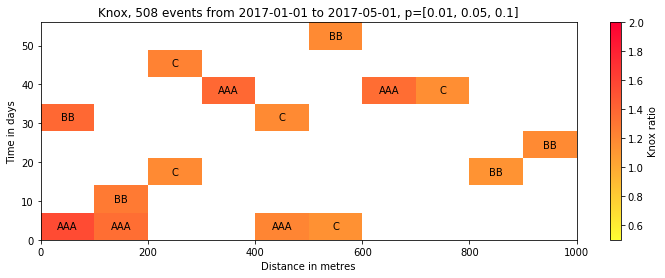

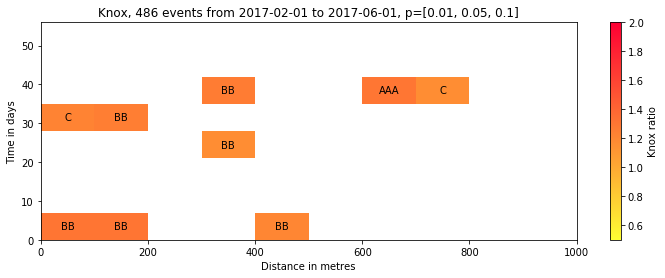

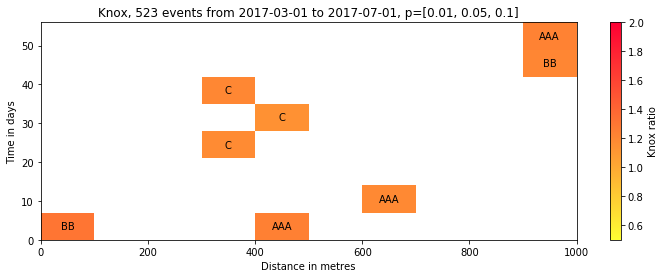

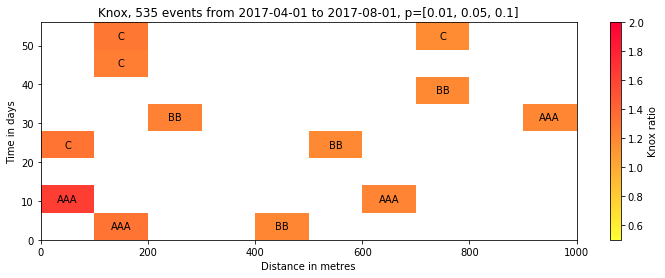

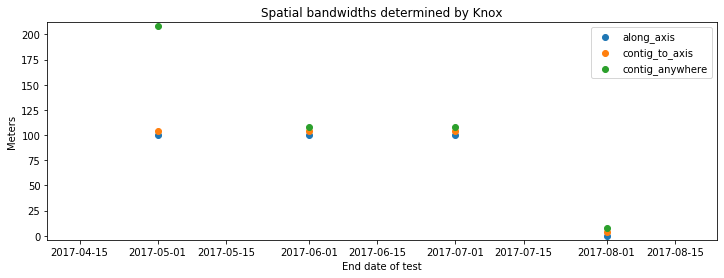

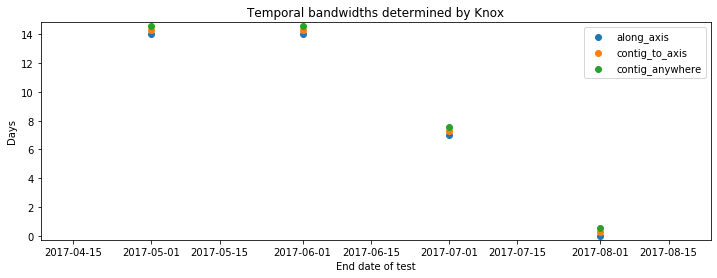

In [4]:
#Analyse output

# Input parameters
datadir = "../../Data"
knoxrun_file_name = "knoxtestingB.txt"
# Significance bands we're interested in
signif_cutoff = [0.01, 0.05, 0.1]

make_graphs_from_knox_file(datadir, 
                           knoxrun_file_name, 
                           signif_cutoff=signif_cutoff)
